# **Logistic Regression**

### **Import**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

### **Load the Data**

In [2]:
df = pd.read_csv('../cleaned_data.csv')

## **Model Training**

### **Model 1: All Features**

In [3]:
X = df.drop(columns=['Addicted_Score']).values
y = df['Addicted_Score'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=5)

In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(564, 11)
(564,)
(141, 11)
(141,)


In [6]:
lr = LogisticRegression(max_iter=1000, random_state=5)

In [7]:
lr.fit(X_train, y_train)

/opt/miniconda3/envs/ccmaclrl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,5
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [8]:
y_pred = lr.predict(X_test)

In [9]:
metrics.accuracy_score(y_test, y_pred)

0.9078014184397163

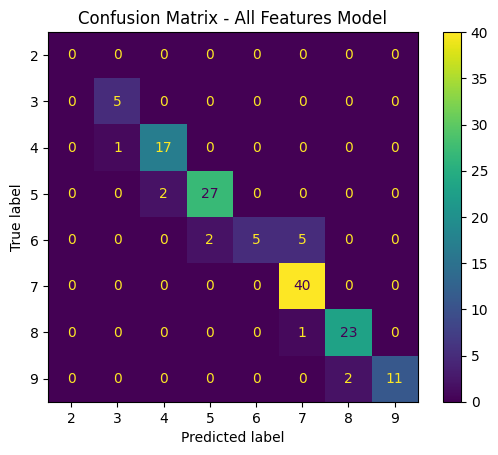

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=lr.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=lr.classes_)
disp.plot()
plt.title('Confusion Matrix - All Features Model')
plt.show()

In [11]:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.9158
Recall: 0.9078
F1-Score: 0.8993


### **Model 2: Selected Features**

In [12]:
selected_features = ['Conflicts_Over_Social_Media', 'Mental_Health_Score', 
                     'Sleep_Hours_Per_Night', 'Affects_Academic_Performance', 
                     'Avg_Daily_Usage_Hours']

X_selected = df[selected_features].values
y_selected = df['Addicted_Score'].values

In [13]:
X_train_selected, X_test_selected, y_train_selected, y_test_selected = train_test_split(X_selected, 
                                                                                        y_selected, 
                                                                                        test_size=0.2, 
                                                                                        random_state=5)

In [14]:
print(X_train_selected.shape)
print(y_train_selected.shape)
print(X_test_selected.shape)
print(y_test_selected.shape)

(564, 5)
(564,)
(141, 5)
(141,)


In [15]:
lr_selected = LogisticRegression(max_iter=1000, random_state=5)

In [16]:
lr_selected.fit(X_train_selected, y_train_selected)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,5
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [17]:
y_pred_selected = lr_selected.predict(X_test_selected)

In [18]:
accuracy = metrics.accuracy_score(y_test_selected, y_pred_selected)
print(f"Model Accuracy: {accuracy:.4f}")
accuracy

Model Accuracy: 0.8652


0.8652482269503546

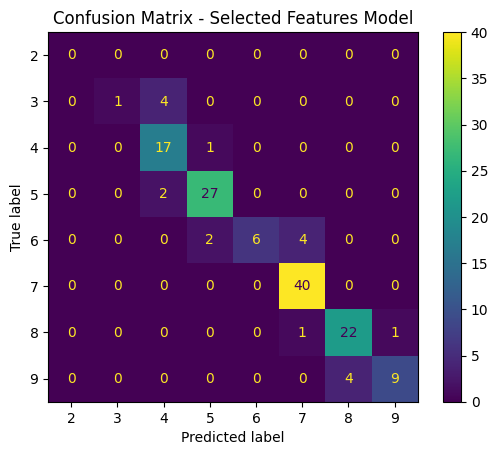

In [19]:
conf_matrix_selected = confusion_matrix(y_test_selected, y_pred_selected, labels=lr_selected.classes_)

disp_selected = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_selected,
                                       display_labels=lr_selected.classes_)
disp_selected.plot()
plt.title('Confusion Matrix - Selected Features Model')
plt.show()

In [20]:
precision = precision_score(y_test_selected, y_pred_selected, average='weighted')
recall = recall_score(y_test_selected, y_pred_selected, average='weighted')
f1 = f1_score(y_test_selected, y_pred_selected, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Precision: 0.8792
Recall: 0.8652
F1-Score: 0.8516
